# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [375]:
# importing the essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [376]:
# to make rows visible upto 500
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

In [377]:
#reading the restaurant names data
names_df = pd.read_csv('Zomato Restaurant names and Metadata.csv')

#reading the zomato reviews data
reviews_df = pd.read_csv('Zomato Restaurant reviews.csv')

# Basic analysis on names data

In [378]:
# Shape of the data
names_df.shape

(105, 6)

In [379]:
#head of the data
names_df.head(5)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [380]:
# Basic information about our dataframe
names_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [381]:
# Columns and the no.of unique observations
names_df.nunique()

Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

* There are total of 105 unique restuarants

# Basic analysis on reviews data

In [382]:
# Shape of the data
reviews_df.shape

(10000, 7)

In [383]:
#head of the data
reviews_df.head(5)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [384]:
# Basic information about our dataframe
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


* There are total of 9955 rows with no null values in this dataset
* It is okay to drop those

In [385]:
# Columns and the no.of unique observations
reviews_df.nunique()

Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64

* Here unique restaurants are 100, So 5 of the restaurants doesn't have any reviews

In [386]:
reviews_df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like', nan],
      dtype=object)

* For the ratings column nan values can be dropped
* But 'Like' might be an invalid entry

# Merging the datasets

In [387]:
#Changing the column name for convenience while merging
names_df = names_df.rename(columns={'Name':'Restaurant'})

# Merging the two dataframes
df = pd.merge(reviews_df, names_df, how='left', on='Restaurant')

In [388]:
df.sample(5)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Links,Cost,Collections,Cuisines,Timings
8498,T Grill,Chandan Mashetty,"Been here with my team mates..chicken kebab, c...",3.5,"38 Reviews , 14 Followers",8/17/2017 16:56,0,https://www.zomato.com/hyderabad/t-grill-gachi...,700,NaN,"North Indian, Andhra, Biryani, Chinese","12:30 PM to 3:30 PM, 7 PM to 11 PM"
39,Beyond Flavours,Sai Raj Kiran,I came here with my parents. We ordered for Th...,4,"2 Reviews , 1 Follower",5/18/2019 15:54,0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
4966,Mathura Vilas,Manidhar_pjr,Mathura vilas.....The food really justifies th...,4,"45 Reviews , 116 Followers",11/21/2018 12:03,3,https://www.zomato.com/hyderabad/mathura-vilas...,500,"Veggie Friendly, Terrific Thalis","South Indian, North Indian, Chinese","11:30 AM to 3:30 PM, 6:45 PM to 11:30 PM"
6528,Komatose - Holiday Inn Express & Suites,Sambit Chatterjee,This place is perfect for party for weekends a...,5,"2 Reviews , 32 Followers",1/5/2019 19:59,4,https://www.zomato.com/hyderabad/komatose-holi...,"1,500","Happy Hours, Top-Rated, Gold Curated","North Indian, Chinese, Japanese, Sushi",1 PM to 11 PM
7625,The Old Madras Baking Company,Anjanaa Karthik,I went very late to this place. Maybe post din...,4,"42 Reviews , 53 Followers",1/11/2019 0:22,4,https://www.zomato.com/hyderabad/the-old-madra...,350,NaN,Bakery,7 AM to 11 PM


# Data Cleaning

In [389]:
# Dropping the unwanted columns
df.drop(['Time', 'Links', 'Collections'], axis=1, inplace=True)

In [390]:
print('\033[1m' + 'Column\t   null count' + '\033[0m')
print(df.isnull().sum())

Column	   null count
Restaurant      0
Reviewer       38
Review         45
Rating         38
Metadata       38
Pictures        0
Cost            0
Cuisines        0
Timings       100
dtype: int64


In [391]:
#Dropping the row in which we got invalid entry for Rating
df = df[df['Rating']!='Like']

In [392]:
# rows with Review,Rating,Metadata as null values
df[(df['Review'].isnull())&(df['Rating'].isnull())&(df['Metadata'].isnull())].shape[0]

38

* As there are more than 38 rows which having the above columns as null, Imputation of ratings is unneccesary
* Even if we imput, we have to drop those rows as they still have null values

In [393]:
#removing all the rows with null values
df = df[(df['Review'].notna())&(df['Timings'].notna())]

In [394]:
print('\033[1m' + 'Column\t   null count' + '\033[0m')
print(df.isnull().sum())

Column	   null count
Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Pictures      0
Cost          0
Cuisines      0
Timings       0
dtype: int64


# Data PreProcessing

In [395]:
#Datatypes of our dataframe
df.dtypes

Restaurant    object
Reviewer      object
Review        object
Rating        object
Metadata      object
Pictures       int64
Cost          object
Cuisines      object
Timings       object
dtype: object

In [396]:
#Changing the datatypes of Restaurant, Review
df['Restaurant'] = df['Restaurant'].astype(str)
df['Review'] = df['Review'].astype(str)
df['Rating'] = df['Rating'].astype(float)

In [397]:
# Cost values are separated by comma in general (22,500 = 22500)
df['Cost'] = df['Cost'].str.replace(',','').astype(int)

In [398]:
# Making a cuisine list for every restaurant
df['Cuisines'] = df['Cuisines'].str.split(',')

In [399]:
df.sample(5)

,Restaurant,Reviewer,Review,Rating,Metadata,Pictures,Cost,Cuisines,Timings
1656,NorFest - The Dhaba,Madhuri Puramsetti,"Good food, great service... Been coming here s...",5.0,"1 Review , 4 Followers",0,550,[North Indian],12 Noon to 10:30 PM
1149,Barbeque Nation,Harry N,Excellent place.\nTaste of food is good. Sprea...,4.0,"28 Reviews , 9 Followers",0,1600,"[Mediterranean, North Indian, Kebab, BBQ]","12 Noon to 3:30 PM, 6:30 PM to 11:30 PM"
1898,10 Downing Street,Anirudh Verma,In love with Calcutta 10 downing Street and fo...,5.0,"126 Reviews , 216 Followers",7,1900,"[North Indian, Chinese, Continental]",12 Noon to 12 Midnight
1520,KFC,Pramit Bandyopadhyay,I have been to this place and also ordered fro...,4.0,"11 Reviews , 1 Follower",0,500,"[Burger, Fast Food]",11 AM to 11 PM
644,eat.fit,Sravanthi,I had ordered veg pulav and egg masala bowl no...,1.0,2 Reviews,1,500,"[Healthy Food, North Indian, Continental, S...",7 AM to 10 PM


In [400]:
# Function to split the meta data into reviews count and followers count
def meta_split(row):
    reviews = int(row.split(',')[0].split()[0])
    try :
        followers = int(row.split(',')[1].split()[0])
    except:
        followers = 0
    return reviews,followers

In [401]:
#Dividing Metadata into reviews and followers column
df['Reviews'],df['Followers'] = zip(*df['Metadata'].map(meta_split))

#Dropping metadata
df = df.drop('Metadata',axis=1)

In [402]:
df.sample(5)

,Restaurant,Reviewer,Review,Rating,Pictures,Cost,Cuisines,Timings,Reviews,Followers
4168,Karachi Bakery,Gourav Parihar,Good behavior of the delivery guy.,5.0,0,500,"[Bakery, Fast Food, Desserts]",10 AM to 10 PM,2,0
8215,Al Saba Restaurant,Farhad Tarapore,Finally ate a biryani that I licked off the pl...,4.0,0,750,"[North Indian, Chinese, Seafood, Biryani, ...",6 AM to 11:30 PM,86,647
3557,Green Bawarchi Restaurant,Neeraj Singh,good,4.0,0,700,"[North Indian, Chinese, Biryani]",12 Noon to 11 PM,2,1
1760,Hotel Zara Hi-Fi,Depak,Good food ...............\nBut can you add som...,5.0,0,400,"[Chinese, North Indian]",11:30 AM to 1 AM,2,97
3327,Club Rogue,Shubhangi.1693,One of d best place. Esp for North Indian ! Go...,4.0,0,900,"[North Indian, Fast Food]",11 AM to 12 Midnight,3,1


# Text preprocessing for reviews

In [403]:
from nltk.corpus import stopwords
import string

#storing punctuation marks and digits
removable = string.punctuation + string.digits

#English stopwords
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such",  "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
# Function for preprocessing on reviews
def reviews_processing(review):
    
    #converting the text to lowercase
    review = review.lower()
    
    #removing punctuation marks and digits
    dct = review.maketrans('','',removable)
    review = review.translate(dct)
    
    #removing stopwords from the review
    review = ' '.join(i for i in review.split() if i not in stop_words)
    return review

In [404]:
df['Review'] = df['Review'].apply(reviews_processing)

In [405]:
df.sample(5)

,Restaurant,Reviewer,Review,Rating,Pictures,Cost,Cuisines,Timings,Reviews,Followers
2797,"3B's - Buddies, Bar & Barbecue",Vikhilesh Vickey,nice experience bs gachiboli gobind browe real...,5.0,0,1100,"[North Indian, Mediterranean, European]","12 Noon to 4 PM, 6:30 PM to 11:30 PM",1,10
226,Flechazo,Abhishek Guha,excellent service ambience friendly staff than...,5.0,0,1300,"[Asian, Mediterranean, North Indian, Desserts]","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",1,0
4335,The Foodie Monster Kitchen,Charushila Biswas,ordered classic waffle foodie monster kitchen ...,4.0,2,500,"[American, Wraps, Desserts]",7 AM to 1 AM,42,1384
24,Beyond Flavours,Amritap Datta,excellent experience mouthwatering food good a...,5.0,0,800,"[Chinese, Continental, Kebab, European, So...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",1,0
2551,Tiki Shack,Rajesh Smileey,no dance floor dj not good need improve dj sys...,3.0,0,1000,[Continental],"12Noon to 11PM (Mon-Thu),12Noon to 11:30PM (Fr...",2,51


# Top Restaurants

In [406]:
#Storing top restaurants sorted by rating
by_rating = df.groupby('Restaurant')['Rating'].mean().reset_index().sort_values(by='Rating', ascending=False)
by_rating.columns=['Restaurant','avg_rating']
by_rating.head(10)

,Restaurant,avg_rating
3,AB's - Absolute Barbecues,4.88
11,B-Dubs,4.81
2,"3B's - Buddies, Bar & Barbecue",4.76
67,Paradise,4.70
35,Flechazo,4.66
86,The Indi Grill,4.60
96,Zega - Sheraton Hyderabad Hotel,4.45
64,Over The Moon Brew Company,4.34
16,Beyond Flavours,4.28
19,Cascade - Radisson Hyderabad Hitec City,4.26


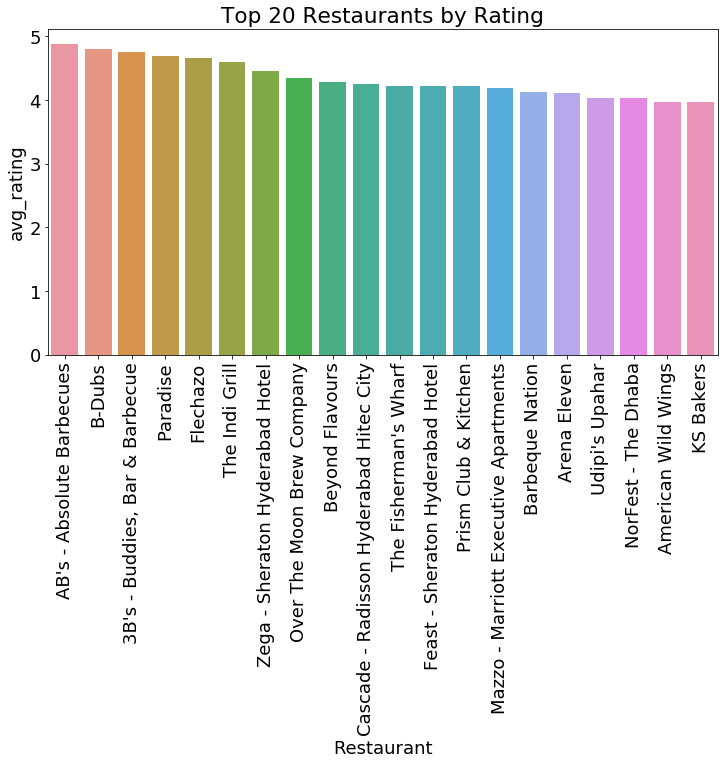

In [407]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(12,6))
sns.barplot(data=by_rating[:20], x='Restaurant', y='avg_rating')
plt.title('Top 20 Restaurants by Rating')
plt.xticks(rotation='vertical')
plt.show()

* So these are the top 20 restaurants based on the avg ratings given by customers

# Pictures vs Avg Ratings

In [408]:
#Storing top restaurants sorted by rating
pic_ratings = df.groupby('Pictures')['Rating'].mean().reset_index().sort_values(by='Pictures')[:40]
pic_ratings.columns=['Pictures','avg_rating']
pic_ratings[:8]

,Pictures,avg_rating
0,0,3.537145
1,1,3.630868
2,2,3.891076
3,3,4.088843
4,4,3.880952
5,5,3.965217
6,6,3.970588
7,7,4.029412


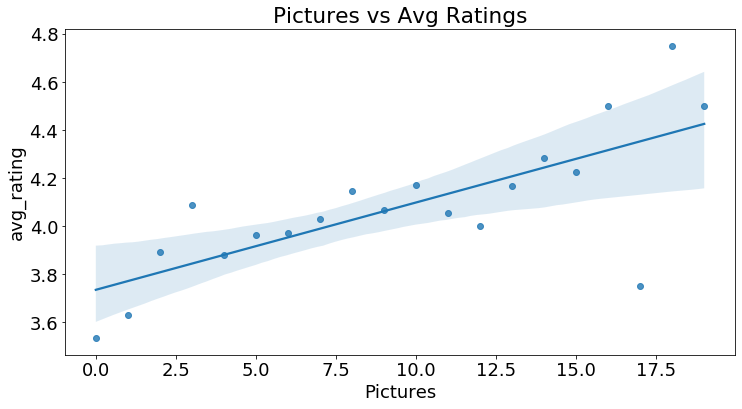

In [409]:
plt.figure(figsize=(12,6))
#sns.scatterplot(data=pic_ratings[:20], x='Pictures', y='avg_rating')
sns.regplot(data=pic_ratings[:20] , x='Pictures', y='avg_rating')
plt.title('Pictures vs Avg Ratings')
plt.show()

* It has been observed that average ratings are being increased when pictures in the reviews are increasing

# Critics Analysis

In [410]:
by_reviews = df.groupby(['Reviewer','Followers','Reviews'])['Rating'].mean().reset_index().sort_values(by='Reviews',ascending=False)
by_reviews.columns=['Reviewer','Followers','Reviews','avg_ratings']
by_reviews['rating_range'] = pd.cut(by_reviews['avg_ratings'], [0,2.5,3,3.5,4,4.5,5], labels=['<2.5','<3','<3.5','<4','<4.5','<5'])
by_reviews.head(10)

,Reviewer,Followers,Reviews,avg_ratings,rating_range
826,Anvesh Chowdary,1654,1031,3.333333,<3.5
7851,ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ,794,685,2.000000,<2.5
80,Abc098,2275,665,3.000000,<3
3428,Mithun Ravindranathan,2863,560,4.000000,<4
3475,Mohd Zubair Ali (Hyderabad.Food.Diaries),1688,482,4.000000,<4
1252,Bhargava Krishna,1302,472,3.500000,<3.5
1821,Epicurean Tales,2464,452,4.000000,<4
4624,Raghu,1016,443,3.416667,<3.5
63,Aarti Kamath,5451,417,4.500000,<4.5
6131,Shrishail Deshnur,1047,414,3.500000,<3.5


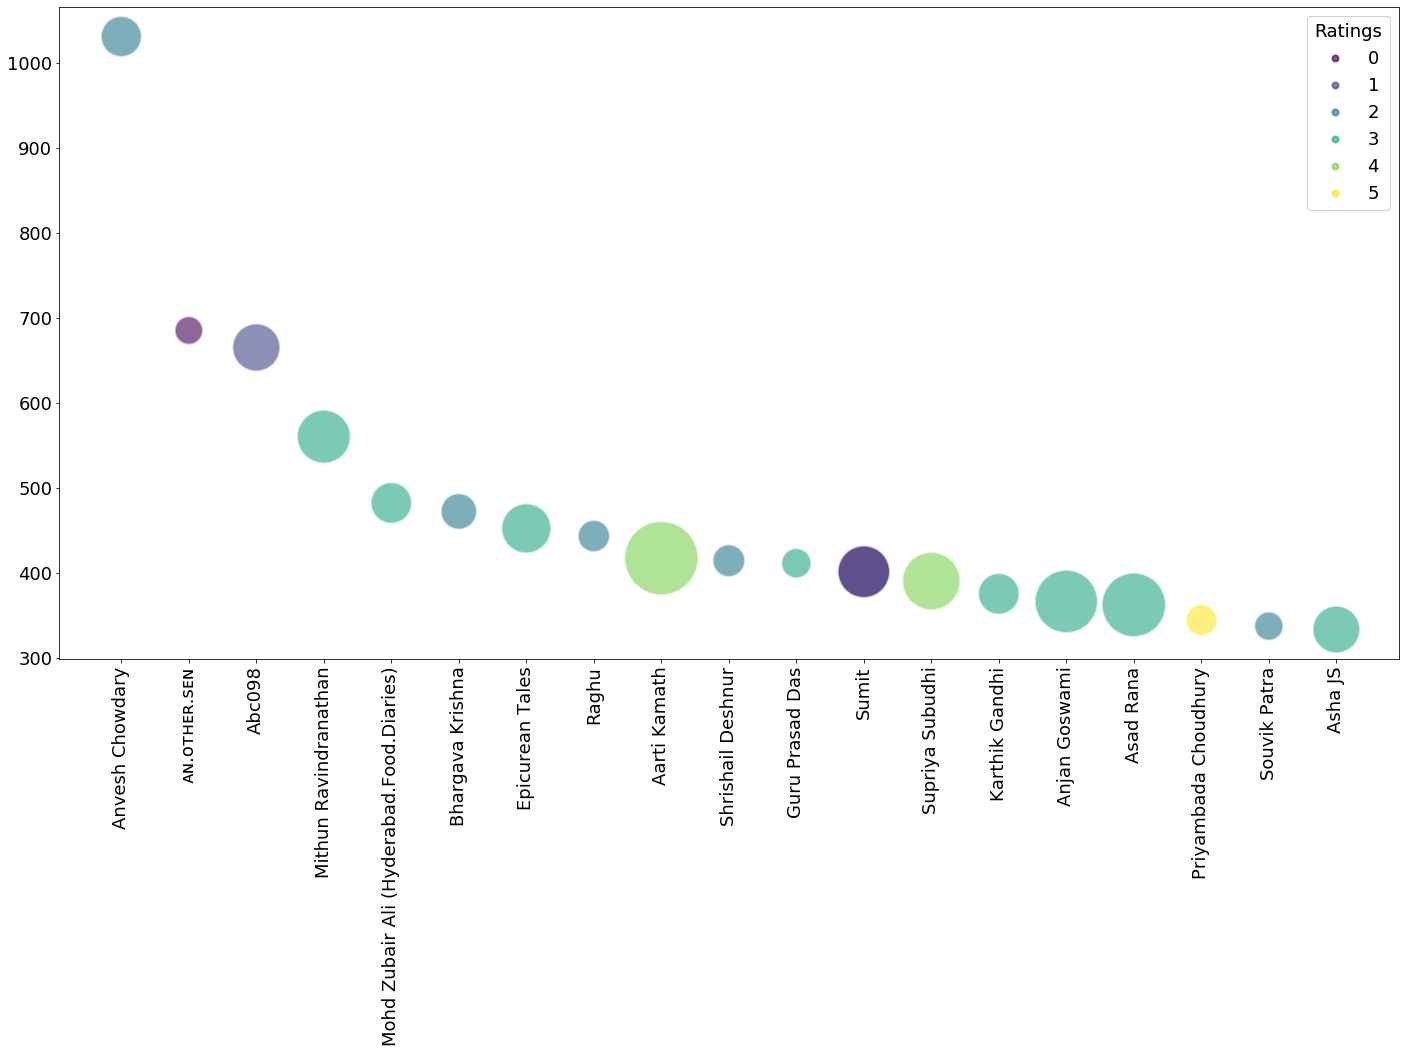

In [411]:
fig, ax = plt.subplots(figsize = (24,12))
scatter = ax.scatter(
    x = by_reviews['Reviewer'][:20] , 
    y = by_reviews['Reviews'][:20], 
    s = by_reviews['Followers'][:20], 
    c = by_reviews['rating_range'][:20].cat.codes, 
    alpha=0.6, 
    edgecolors="white", 
    linewidth=2);

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Ratings",fontsize=18)
ax.add_artist(legend1)
plt.xticks(rotation='vertical')
plt.show()

* The most experienced critics based on their number of reviews given in order
* Size represents their followers
* Respective colors represnt the avg ratings
* Their reviews can give a big impact on our restaurant

# Frequently used words

In [412]:
from sklearn.feature_extraction.text import CountVectorizer
def most_used_words(sentiment,n):
    #positive sentiment = ratings with 4,5
    #negative sentiment = ratings with 1,2
    #neutral sentiment = ratings with 3
    sentiments = {1:[4,5,'Positive '],0:[3,3.5,'Neutral '],-1:[1,2.5,'Negative ']}
    df1 = df[(df['Rating']>=sentiments[sentiment][0]) & (df['Rating']<=sentiments[sentiment][1])]
    #converts words into vectors based on count
    cv = CountVectorizer(ngram_range= (n,n))
    total_words = cv.fit_transform(df1['Review'])
    
    #Will count the total number if occurances of each word in all reviews
    count = total_words.sum(axis = 0)
    
    #storing and sorting them in a list of tuples
    freq_df = pd.DataFrame((word, count[0, idx]) for word, idx in cv.vocabulary_.items())
    freq_df.columns=[sentiments[sentiment][2]+'Words','Frequency']
    freq_df = freq_df.sort_values(by='Frequency',ascending=False)
    
    return freq_df.reset_index().drop('index',axis=1)

In [413]:
pos_df1 = most_used_words(1,1)
pos_df2 = most_used_words(1,2)
pos_df3 = most_used_words(1,3)
neu_df3 = most_used_words(0,3)
neg_df1 = most_used_words(-1,1)
neg_df2 = most_used_words(-1,2)
neg_df3 = most_used_words(-1,3)

In [414]:
from wordcloud import WordCloud

#Function for plotting wordcloud
def create_cloud(data,sentiment):
    
    #colors for different sentiments
    color = ['Blues','Greens','Reds']
    
    #total list of words in the reviews column
    word_list=list(data.iloc[:,0][:100])
    
    #storing all of them in a single string
    strr=''
    for i in word_list:
        i=i.replace(' ','')
        strr=strr+i+' '
    
    #creating a wordcloud
    wordcloud = WordCloud(width = 2400, height = 1200, 
                    background_color ='white',  
                    min_font_size = 12,colormap=color[sentiment]).generate(strr)
    plt.figure(figsize = (24,12), facecolor = 'black') 
    plt.imshow(wordcloud)
    plt.axis('off')

In [415]:
pd.concat([neg_df1['Negative Words'][:15] ,pos_df1['Positive Words'][:15]],axis=1)

,Negative Words,Positive Words
0,not,good
1,food,food
2,place,place
3,ordered,service
4,good,chicken
5,chicken,great
6,service,ambience
7,order,taste
8,no,best
9,bad,nice


In [416]:
pd.concat([neg_df2['Negative Words'][:15] ,pos_df2['Positive Words'][:15]],axis=1)

,Negative Words,Positive Words
0,not good,must try
1,food not,good food
2,main course,really good
3,not even,food good
4,bad experience,main course
5,worst experience,good place
6,not worth,one best
7,ordered chicken,good service
8,waste money,visit place
9,ice cream,nice place


In [417]:
pd.concat([neg_df3['Negative Words'][:15] ,pos_df3['Positive Words'][:15]],axis=1)

,Negative Words,Positive Words
0,food not good,must visit place
1,taste not good,place hangout friends
2,worst experience ever,north indian food
3,also not good,veg non veg
4,not upto mark,good place hangout
5,not worth money,overall good experience
6,ordered chicken biryani,food really good
7,not cooked properly,good food good
8,would not recommend,one best places
9,not good experience,food good service


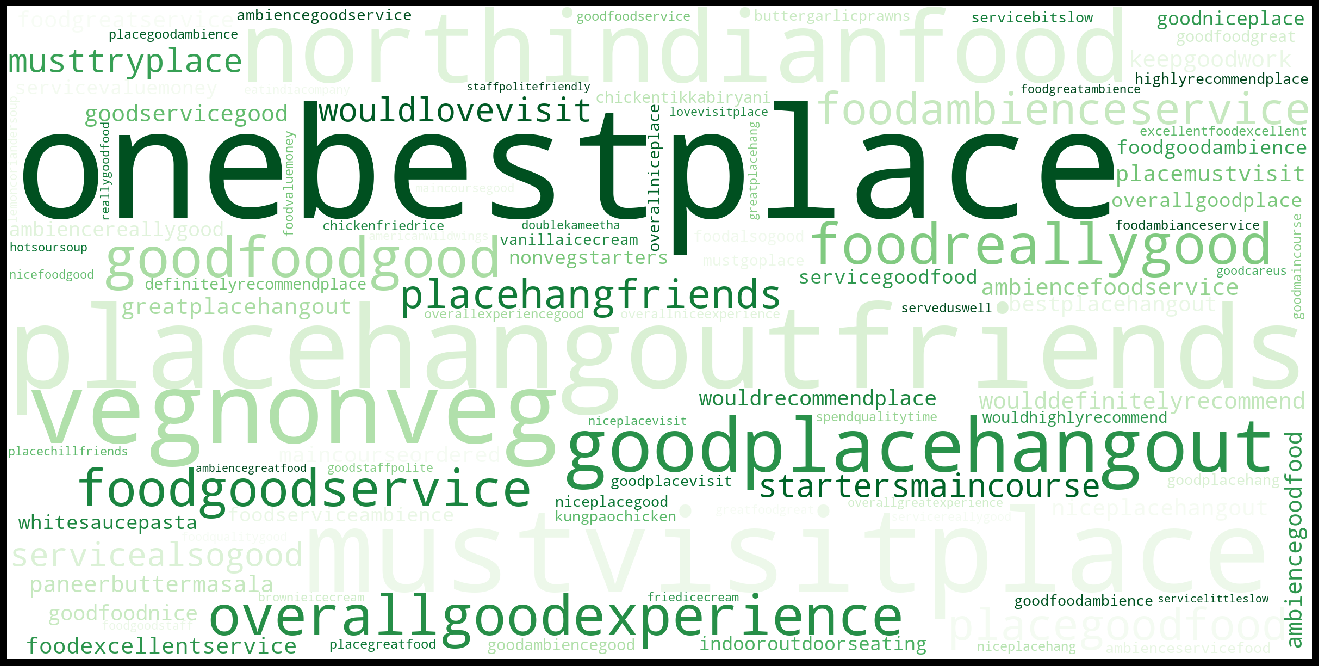

In [418]:
create_cloud(pos_df3,1)

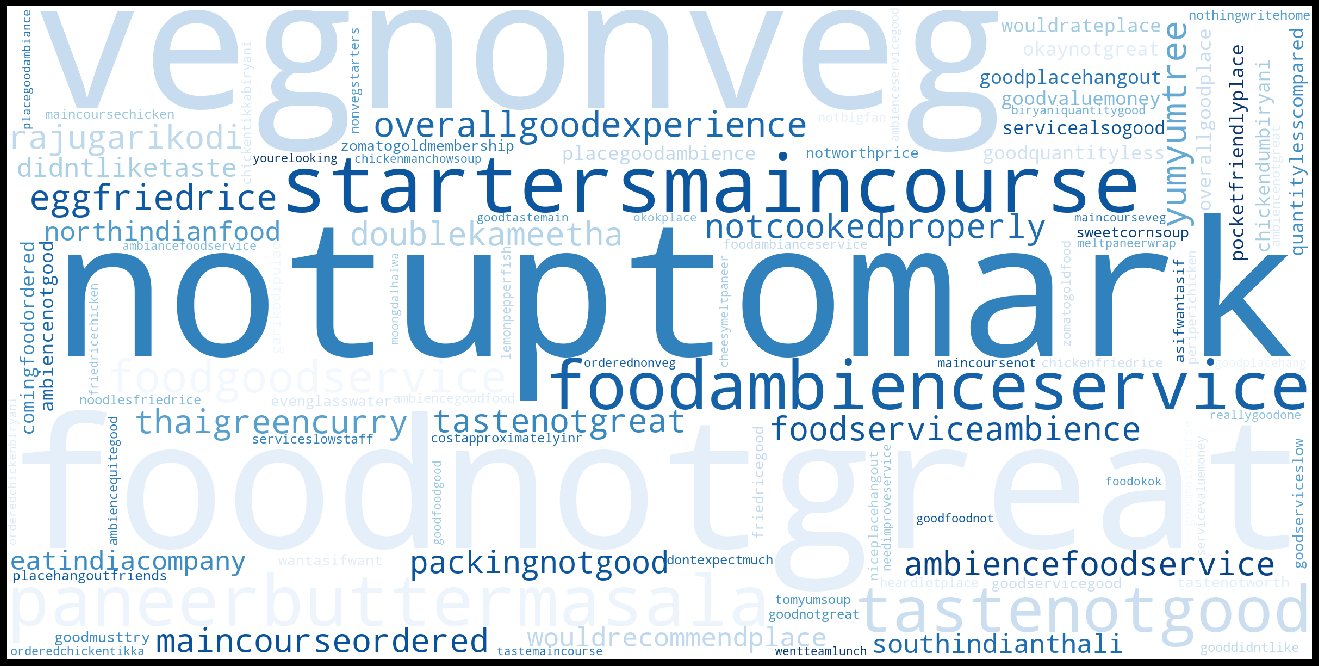

In [419]:
create_cloud(neu_df3,0)

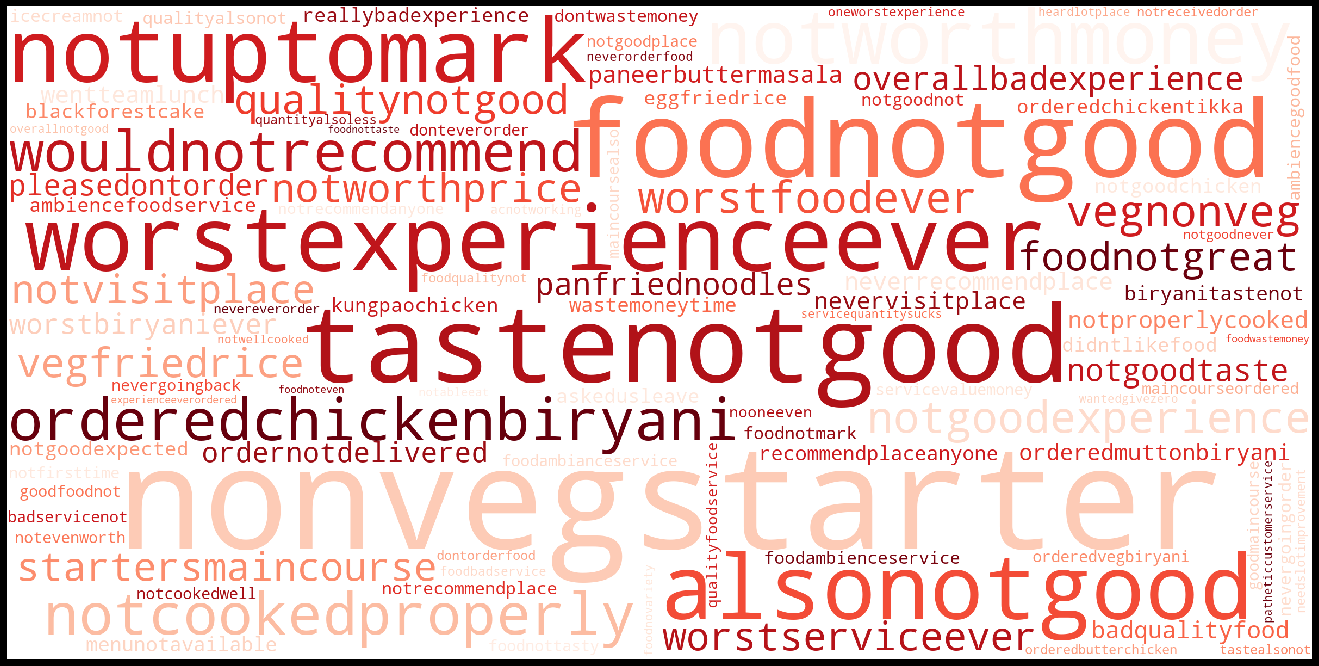

In [420]:
create_cloud(neg_df3,-1)

In [424]:
from textblob import TextBlob as tb
#Function to get sentiment score
def get_sentiment_score(review):
    return round(tb(review).sentiment.polarity,2)

#To classify them as Positive or negative or neutral
def get_sentiment(review):
    score = get_sentiment_score(review)
    if score :
        if score > 0:
            return 'Positive'
        else :
            return 'Negative'
    else:
        return 'Neutral'
    
# Customized scalar for sentiment score
def scaler(lst):
    lst1 = []
    mini = min(lst)
    maxi = max(lst)
    for i in lst:
        lst1.append(round(((i-mini)/(maxi-mini))*4+1,2))
    return lst1
df['sentiment_score'] = df['Review'].apply(get_sentiment_score)
df['Sentiment'] = df['Review'].apply(get_sentiment)

In [422]:
# Storing avg_ratings and avg sentimentscores of restaurants on same scale of 1-5
sentiment_df = df.groupby('Restaurant')[['sentiment_score','Rating']].mean().reset_index()
sentiment_df.columns = ['Restaurant','avg_sentiment','avg_rating']
sentiment_df['avg_sentiment'] = scaler(list(sentiment_df['avg_sentiment']))
sentiment_df['avg_rating'] = scaler(list(sentiment_df['avg_rating']))

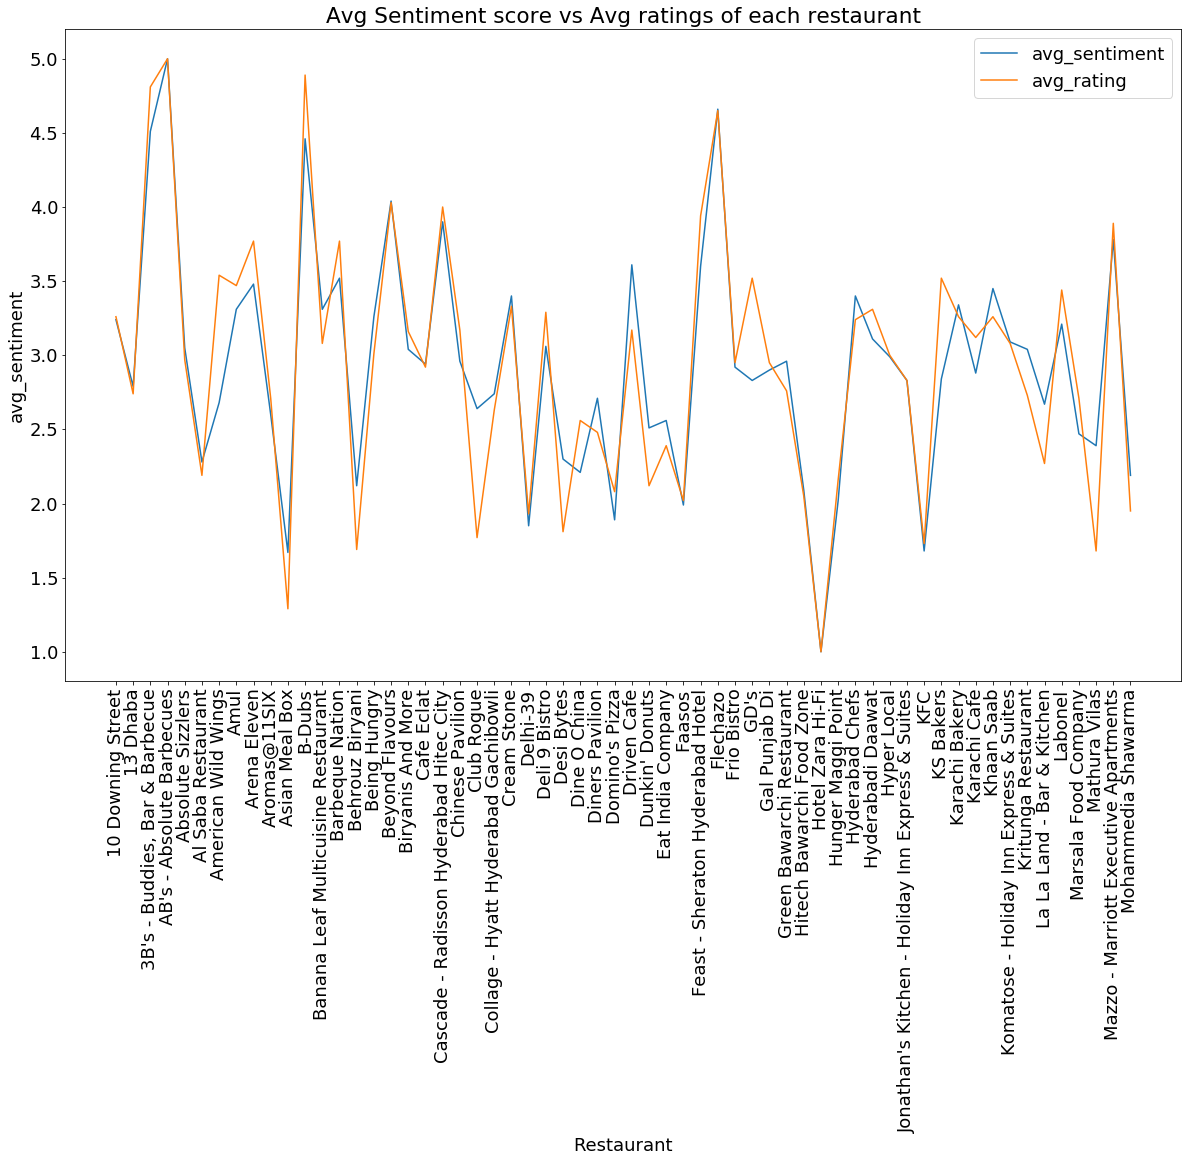

In [423]:
plt.figure(figsize=(20,12))
sns.lineplot(x = sentiment_df['Restaurant'][:60] ,y = sentiment_df['avg_sentiment'][:60])
sns.lineplot(x = sentiment_df['Restaurant'][:60],y = sentiment_df['avg_rating'][:60])
plt.xticks(rotation='vertical')
plt.title('Avg Sentiment score vs Avg ratings of each restaurant')
plt.legend(['avg_sentiment', 'avg_rating'])
plt.show()

* Here we can observe that some of the critics gave low ratings and positive reviews
* It may caused because of the difference between individual perspective
* Some may give 3 for the best experience and same 3 by some who does'nt satisfied

# Business Perspective
* Few people gave 1-3 ratings although the food tastes good.
* But just because of delivery/ packing issues etc
* So it is better to store ratings for individual category like delivery, packaging, food etc